In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("Ali_Baba_Stock_Data.csv")
data.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2617 non-null   object 
 1   Adj Close  2617 non-null   float64
 2   Close      2617 non-null   float64
 3   High       2617 non-null   float64
 4   Low        2617 non-null   float64
 5   Open       2617 non-null   float64
 6   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB


In [5]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,130.763001,135.153905,136.919684,133.360942,135.248746,1.899231e+07
std,56.741744,58.951556,59.579593,58.244218,59.037467,1.291504e+07
min,55.424198,57.389999,58.650002,57.200001,57.299999,3.775300e+06
25%,82.445793,84.849998,85.699997,84.000000,85.000000,1.186070e+07
50%,105.469185,108.989998,110.650002,107.260002,108.500000,1.600840e+07
75%,173.061798,179.199997,181.389999,177.000000,179.369995,2.172430e+07
max,306.276886,317.140015,319.320007,308.910004,313.500000,2.718794e+08


In [6]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
data.duplicated().sum()

0

# EDA 

In [9]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

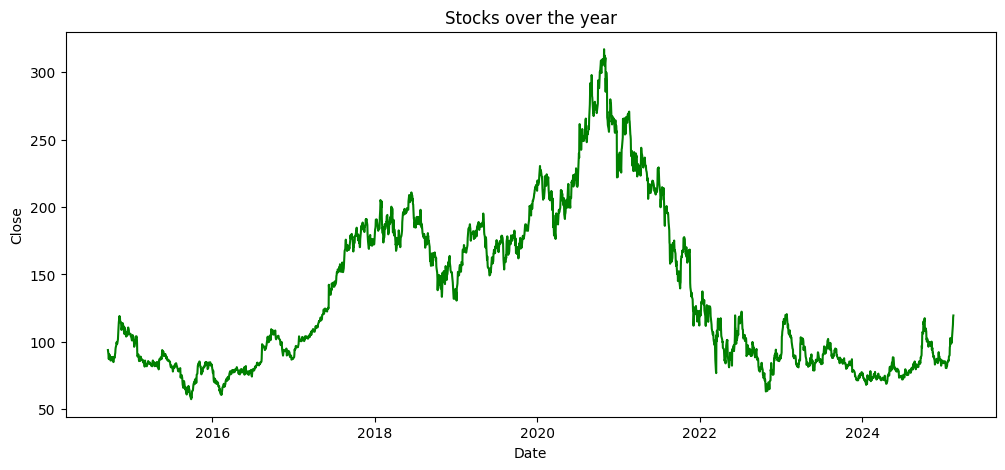

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data,color="green")
plt.title("Stocks over the year")
plt.show()

<Axes: >

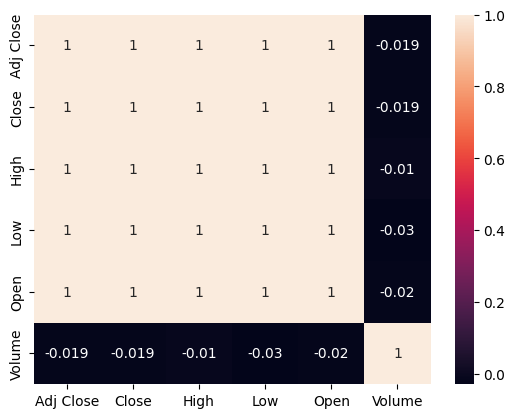

In [15]:
sns.heatmap(data.corr(),annot=True)

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_41743/976180521.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([""])
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_41743/976180521.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([""])
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_41743/976180521.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([""])
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_41743/976180521.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([""])
/var/folders/km/41xdld515hq8qyv7nx3q

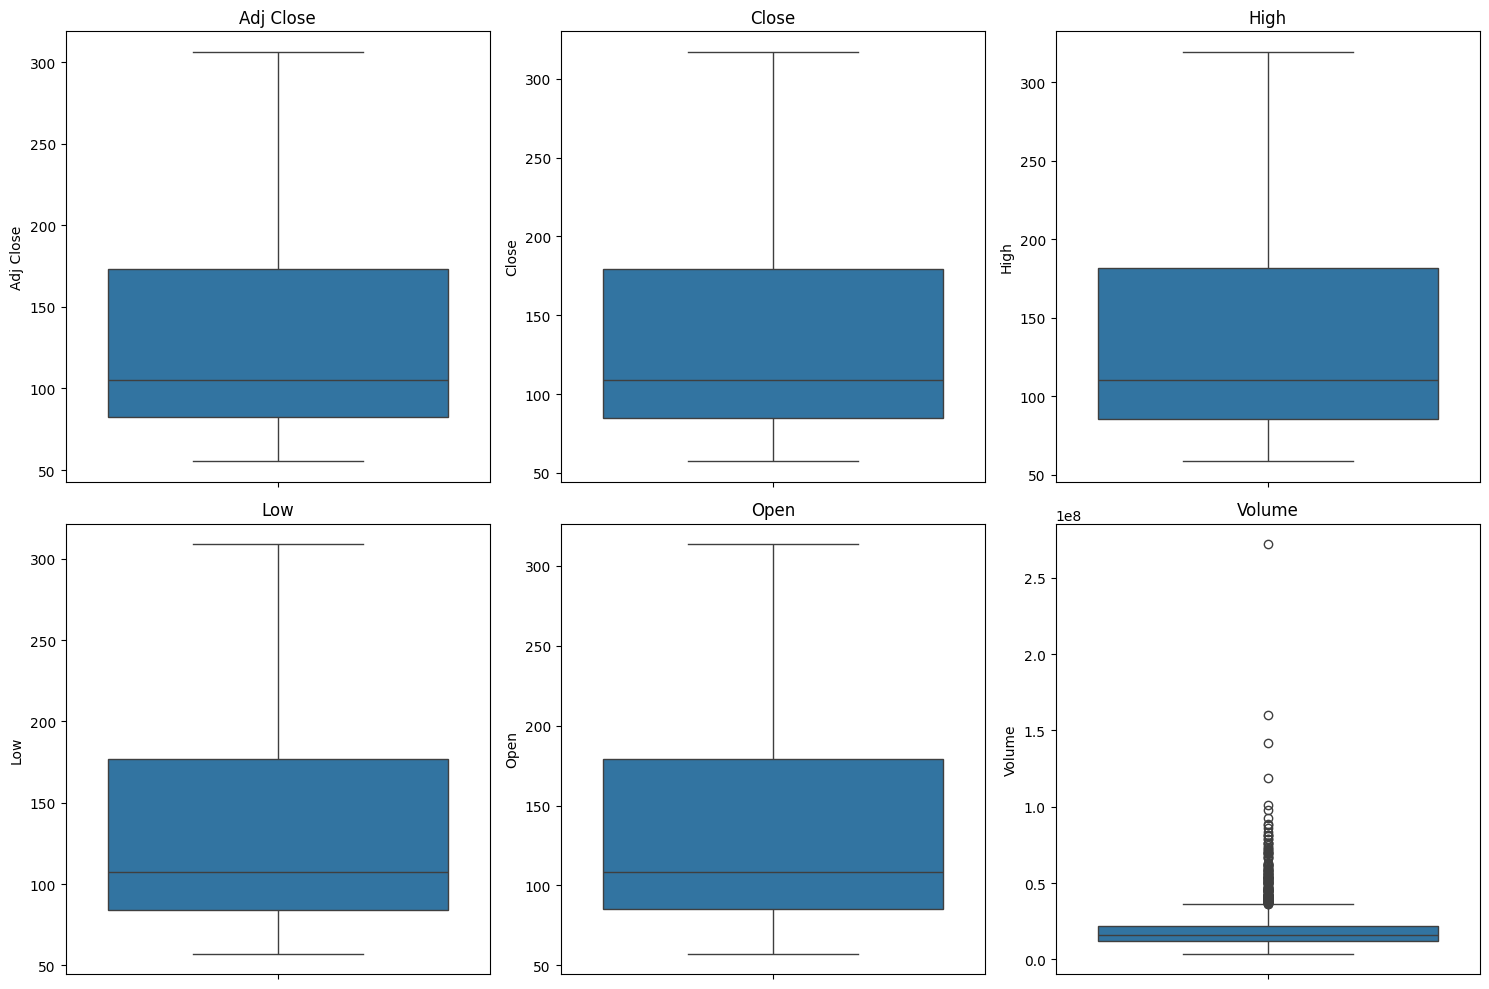

In [20]:
num_cols = data.select_dtypes(include='number').columns
n_cols = 3 
n_rows = (len(num_cols) // n_cols) + (len(num_cols) % n_cols > 0) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows)) 
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(col) 
    axes[i].set_xticklabels([""]) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

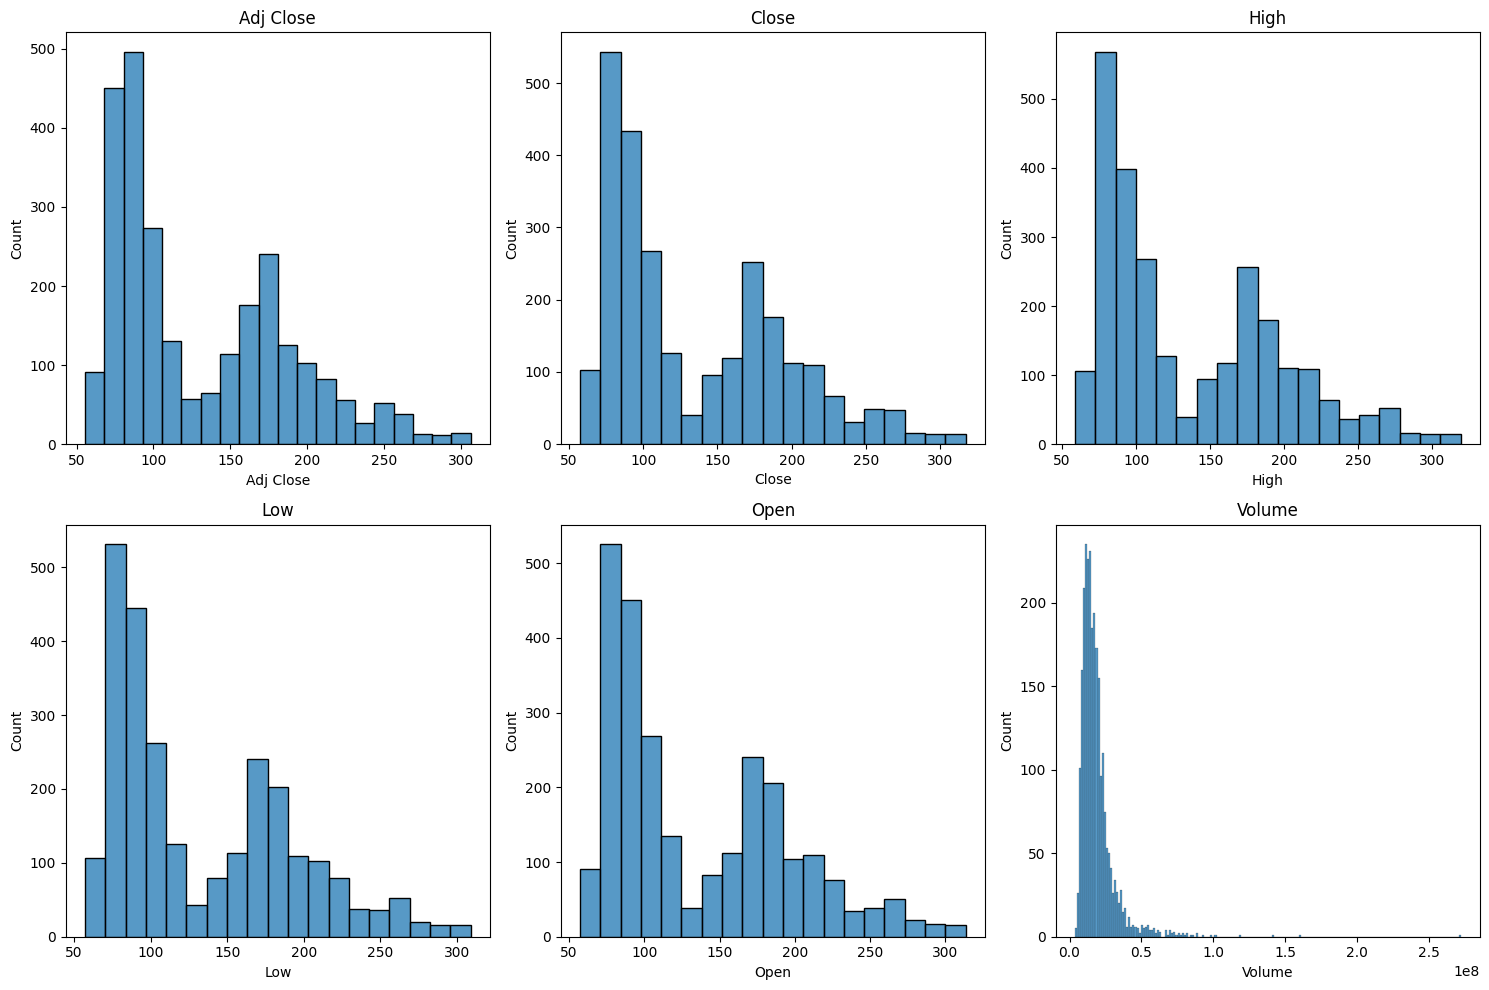

In [22]:
num_cols = data.select_dtypes(include='number').columns
n_cols = 3 
n_rows = (len(num_cols) // n_cols) + (len(num_cols) % n_cols > 0) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows)) 
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data=data[col], ax=axes[i])
    axes[i].set_title(col) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature Engineering

In [23]:
x=data.drop(["Close"],axis=1)
y=data["Close"]
ss=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Check Stationary of Data

In [32]:
from statsmodels.tsa.stattools import adfuller  
result = adfuller(data["Close"])  
print("ADF Statistic:", result[0])  
print("p-value:", result[1])  
if result[1]<0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -1.3595506887082913
p-value: 0.6015071789226754
Data is not stationary


In [33]:
data["Close_diff"] = data["Close"].diff().dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(data["Close_diff"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1]<0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF Statistic: -10.8341277711587
p-value: 1.6788719818608343e-19
Data is stationary


# ACF and PCAF Plot

<Figure size 1200x500 with 0 Axes>

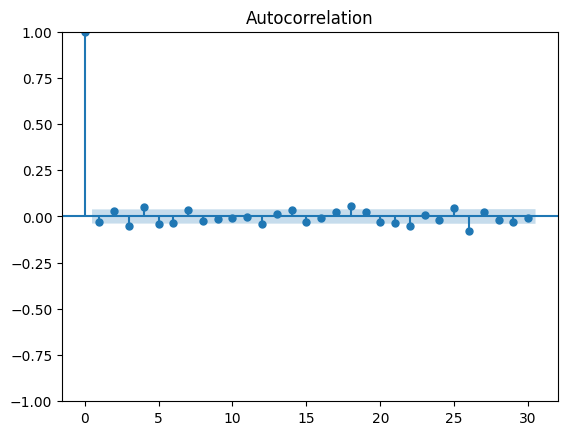

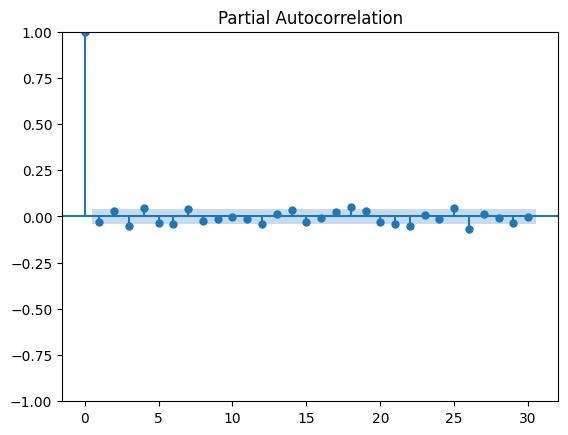

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plot_acf(data["Close_diff"].dropna(), lags=30)
plt.show()

plot_pacf(data["Close_diff"].dropna(), lags=30)
plt.show()


# Use AutoArima

In [37]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore") 
model_auto = auto_arima(data["Close"], 
                        seasonal=False,  
                        stepwise=True,   
                        suppress_warnings=True,
                        trace=True)     
print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14101.880, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14117.360, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14116.629, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14116.779, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14115.380, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14120.734, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14111.386, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14103.871, Time=1.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14099.102, Time=1.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14108.162, Time=0.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14100.014, Time=2.73 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=14099.597, Time=1.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=14106.995, Time=0.71 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=14103.016, Time=2.59 sec
 ARIMA(2,1,3)(0,0,0

# Arima Model

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(2, 1, 3))  
model_fit = model.fit()

# Forecast

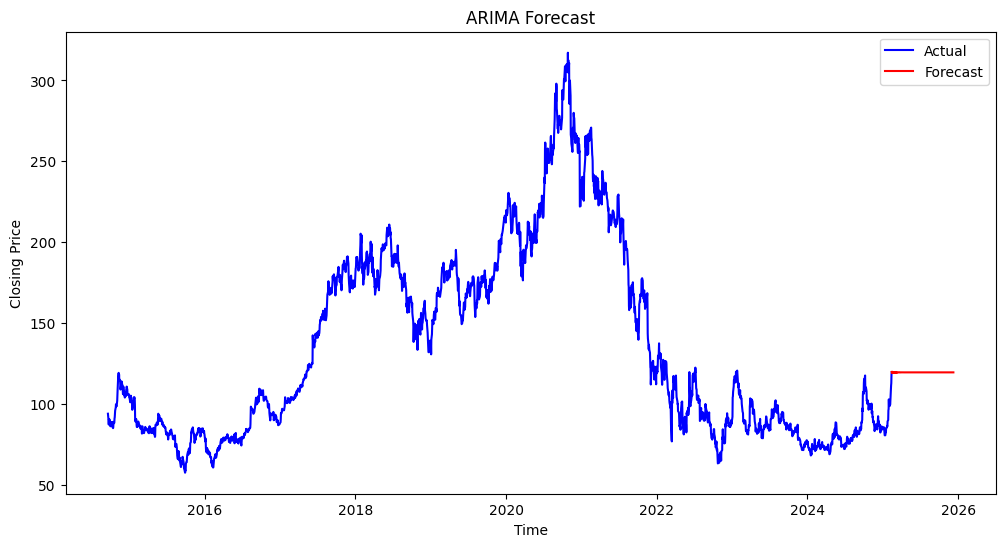

In [45]:
forecast = model_fit.forecast(steps=300)
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label="Actual", color="blue")
plt.plot(pd.date_range(start=data.index[-1], periods=300, freq="D"), forecast, label="Forecast", color="red")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()
